In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# 2. Algoritmo Multipaso
Juan Carlos Rojas V. 202214037, Thomas Andrade H. 202214695

Usando el algoritmo multipaso de orden $\mathcal{O}(h^4)$ integre la ecuación diferencial:

$$\frac{\text{d}y}{\text{d}x} = x +2y,\ \ y(0) = 0$$

Con la distcretización temporal
$\verb|np.linspace(0.,4.,100)|$. Los coeficientes del predictor
y el corrector están dados por:

$$y_{n+1} = y_n + \frac{h}{720}(1901f_n - 2774f_{n-1} + 2616f_{n-2} - 1274f_{n-3} + 251f_{n-4})$$

$$ y_{n+1} = y_n + \frac{h}{1440}(475f_{n+1}+1427f_n - 798f_{n-1} + 482f_{n-2}-173f_{n-3}+27f_{n-4})$$

In [72]:
def analytic_sol(x):
    return -x/2 - (1-np.exp(2*x))/4

In [73]:
def f(x,y):
    return x + 2*y

In [74]:
def Runge_Kutta4(f,y_0,t):

    
    h = t[1] - t[0]
    y = np.zeros_like(t)
    y[0] = y_0
    
    for i in range(1,len(t)):
        k1 = h*f(y[i-1],t[i-1])
        k2 = h*f(t[i-1]+h/2,y[i-1] +k1/2)
        k3 = h* f(t[i-1]+h/2, y[i-1] + k2/2)
        k4 = h* f(t[i-1]+h,y[i-1] +k3)
        y[i] = y[i-1] + (k1+2*k2+2*k3+k4)/6
    
    return y

In [75]:
def Adams_Bashforth_Moulton(f,x,y_sol_proposed):

    
    h = x[1] - x[0]
    
    y = y_sol_proposed.copy() 
    yc = y.copy() 
    
    for i in range(5,len(x)):

        
        y[i] = y[i-1] + h*((1901/720)*f(x[i-1],y[i-1]) -(2774/720)*f(x[i-2],y[i-2]) + (2616/720)*f(x[i-3],y[i-3]) -(1274/720)*f(x[i-4],y[i-4]) + (251/720)*f(x[i-5],y[i-5]))
        yc[i] = y[i]
        
        """
        Lo que sigue es la parte Moulton, que se trata de la corrección de la predicción
        que hizo el algoritmo Bashforth para la solución (de mierda) que te entregó RK. Hay de varios órdenes (en este caso 2) en Wiki están los demás-
        """
        
        yc[i] = yc[i-1] + h*( (475/1440)*f(x[i],y[i]) + (1427/1440)*f(x[i-1],y[i-1]) -(798/1440)* f(x[i-2],y[i-2]) + (482/1440)*f(x[i-3],y[i-3]) - (172/1440)*f(x[i-4],y[i-4]) + (27/1440)*f(x[i-5],y[i-5]))
        
        return y,yc # Te devuelve la predicción y la corrección (respectivamente)
        

In [76]:
N = 100
t = np.linspace(0.,4.,N)
y_0 = 0

In [79]:
y_mala = Runge_Kutta4(f,y_0,t)
y_bashforth,y_moulton = Adams_Bashforth_Moulton(f,t,y_mala)

¿Cómo encontrar los puntos $n = 1,2,3,4$?

Los puntos mencionados pueden ser encontrados por medio de un algoritmo que de una solución provisional para que el algoritmo de Adams puede predecir y corregir la solución inicial dada por el algoritmo inicial, en este caso Runge-Kutta 4.


Compare gráficamente en escala logarítmica con la solución exacta: 

$$y(x) = -x/2 - (1-e^{2x})/4$$

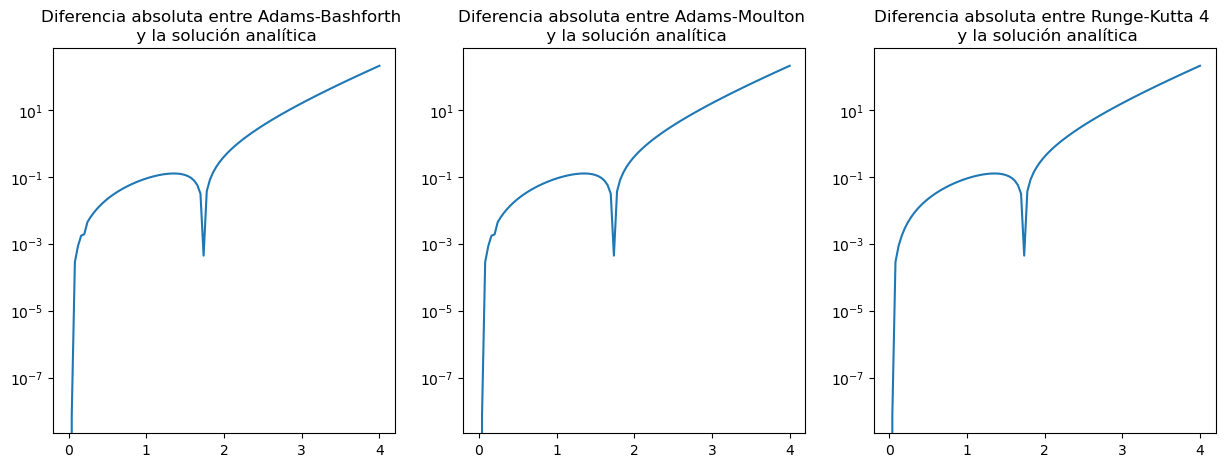

In [78]:
fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(131)
ax2 = fig.add_subplot(132)
ax3 = fig.add_subplot(133)

ax1.plot(t,abs(analytic_sol(t)-y_bashforth),linestyle="solid")
ax1.set_title("Diferencia absoluta entre Adams-Bashforth \n y la solución analítica")
ax1.set_yscale("log")

ax2.plot(t,abs(analytic_sol(t)-y_moulton),linestyle="solid")
ax2.set_title("Diferencia absoluta entre Adams-Moulton \n y la solución analítica")
ax2.set_yscale("log")


ax3.plot(t,abs(analytic_sol(t)-y_mala),linestyle="solid")
ax3.set_title("Diferencia absoluta entre Runge-Kutta 4 \n y la solución analítica")
ax3.set_yscale("log")


Si bien las diferencias entre las soluciones numéricas y exactas son pequeñas, al inicio las diferencias son pequeñas, sin embargo, cuando $x$ crece, la diferencia aumenta debido al comportamiento exponencial de la solucón exacta.

Los puntos correspondientes a $n =1,2,3,4$ fueron calculados con una aproximación hecha por el método de Runge-Kutta 4.